In [1]:
import sys
sys.path.append('../')

import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer 
import random
import imp
from modules import data_cleaning

%load_ext rpy2.ipython
import rpy2.robjects.lib.ggplot2 as ggplot2

In [100]:
sense_examples = pd.read_csv('sense_examples_from_corpora.csv').sort_values(by=['lemma', 'sense_name'])
sense_examples = sense_examples.drop(columns=['contains_word'])

In [101]:
sense_examples.Notes.value_counts()

unknown sense    44
bad lemma        24
proper noun      16
Name: Notes, dtype: int64

In [102]:
sense_examples.example_source.value_counts()

wordnet         1756
hand_written     785
childes          262
no_example        84
Name: example_source, dtype: int64

In [103]:
def getWordNetExamples(sense_name):
    return wn.synset(sense_name).examples()

In [104]:
sense_examples['Num_WN_Examples'] = sense_examples.sense_name.apply(lambda synset_name: len(getWordNetExamples(synset_name)))

In [105]:
sense_examples.loc[(sense_examples['Num_WN_Examples'] == 0) & 
                   (sense_examples['Notes'].isna()), 'Notes'] = 'no wordnet example for sense'

sense_examples.loc[(sense_examples['Num_WN_Examples'] != 0) & 
                   (sense_examples['Notes'].isna()) &
                   (sense_examples['example_source']!='wordnet'), 'Notes'] = 'no wordnet example for lemma'
sense_examples.loc[(sense_examples['example_source'] == 'wordnet'), 'Notes'] = 'wordnet example'

sense_examples.loc[(sense_examples['Notes'] == 'proper nown'), 'Notes'] = 'proper noun'

sense_examples.loc[(sense_examples['example'] == 'No_example'), 'example'] = 'no_example'

In [106]:
sense_examples

,lemma,sense_name,definition,example,example_source,Notes,Num_WN_Examples
2106,airplane,airplane.n.01,an aircraft that has a fixed wing and is power...,The flight was delayed due to trouble with the...,wordnet,wordnet example,1
1719,alligator,alligator.n.01,leather made from alligator's hide,She had an alligator purse,hand_written,no wordnet example for sense,0
703,alligator,alligator.n.02,either of two amphibious reptiles related to c...,He didn't want to be eaten by the alligator di...,childes,no wordnet example for sense,0
2705,animal,animal.n.01,a living organism characterized by voluntary m...,We saw animals at the zoo,hand_written,no wordnet example for sense,0
234,ankle,ankle.n.01,a gliding joint between the distal ends of the...,Be careful you're walking around with your pan...,childes,no wordnet example for sense,0
...,...,...,...,...,...,...,...
2199,yellow,yellow.s.05,cowardly or treacherous; -M.W.Straight,The little yellow stain of treason,wordnet,wordnet example,2
2525,yogurt,yogurt.n.01,a custard-like food made from curdled milk,This is the low fat yogurt we need to get the ...,childes,no wordnet example for sense,0
1168,yucky,disgusting.s.01,highly offensive; arousing aversion or disgust,I think rats are yucky,childes,no wordnet example for lemma,6
2570,zebra,zebra.n.01,any of several fleet black-and-white striped A...,This zebra has black and white stripes,childes,no wordnet example for sense,0


In [107]:
sense_examples.Notes.value_counts()

wordnet example                 1756
no wordnet example for sense     754
no wordnet example for lemma     293
unknown sense                     44
bad lemma                         24
proper noun                       16
Name: Notes, dtype: int64

In [108]:
#specific data cleaning
sense_examples.loc[(sense_examples['definition'] == 'cowardly or treacherous; -M.W.Straight'), 'definition'] = 'cowardly or treacherous'
sense_examples.loc[(sense_examples['example'] == 'too yellow tostand and fight'), 'example'] = 'Too yellow to stand and fight'

In [109]:
sense_examples.loc[(sense_examples['example'] == 'No_example'), 'example'] = 'no_example'

In [110]:
raw_examples = sense_examples
sense_examples = sense_examples[sense_examples['example']!='no_example']
sense_examples = sense_examples.reset_index(drop=True)

In [216]:
final_df = pd.read_csv('final_sense_examples.csv')

In [217]:
final_df

,lemma,sense_name,definition,example,example_source,notes,Num_WN_Examples,group_id
0,airplane,airplane.n.01,an aircraft that has a fixed wing and is power...,The flight was delayed due to trouble with the...,wordnet,wordnet example,1,airplane_1
1,alligator,alligator.n.02,either of two amphibious reptiles related to c...,He didn't want to be eaten by the alligator di...,childes,no wordnet example for sense,0,alligator_1
2,alligator,alligator.n.01,leather made from alligator's hide,She had an alligator purse,hand_written,no wordnet example for sense,0,alligator_1
3,animal,animal.n.01,a living organism characterized by voluntary m...,We saw animals at the zoo,hand_written,no wordnet example for sense,0,animal_1
4,ankle,ankle.n.01,a gliding joint between the distal ends of the...,Be careful you're walking around with your pan...,childes,no wordnet example for sense,0,ankle_1
...,...,...,...,...,...,...,...,...
2796,yellow,chicken.s.01,easily frightened,He's too yellow to go skydiving,hand_written,no wordnet example for sense,0,yellow_2
2797,yogurt,yogurt.n.01,a custard-like food made from curdled milk,This is the low fat yogurt we need to get the ...,childes,no wordnet example for sense,0,yogurt_1
2798,yucky,disgusting.s.01,highly offensive; arousing aversion or disgust,I think rats are yucky,childes,no wordnet example for lemma,6,yucky_1
2799,zebra,zebra.n.01,any of several fleet black-and-white striped A...,This zebra has black and white stripes,childes,no wordnet example for sense,0,zebra_1


In [218]:
#split into stimulus groups

#for each lemma, if there are more than 5 senses, shuffle the senses, and then assign them to groups in sets of 5
final_df = pd.DataFrame(columns=list(sense_examples.columns) + ['group'])
for lemma in set(sense_examples.lemma):
    lemma_senses = sense_examples[sense_examples['lemma']==lemma]
    lemma_senses = lemma_senses.sample(frac=1)
    for i in np.arange(0, (len(lemma_senses)//5)+1):
        max_num = (i+1)*5
        lemma_senses.loc[lemma_senses.index[max_num-5:max_num], 'group'] = int(i+1)
    final_df = pd.concat([final_df, lemma_senses])

In [219]:
final_df

,lemma,sense_name,definition,example,example_source,Notes,Num_WN_Examples,group
1093,garden,garden.n.02,the flowers or vegetables or fruits or herbs t...,These are fresh from the garden,hand_written,no wordnet example for sense,0,1.0
1094,garden,garden.n.03,a yard or lawn adjoining a house,She looked out on the garden,hand_written,no wordnet example for sense,0,1.0
1092,garden,garden.n.01,a plot of ground where plants are cultivated,Those are stairs that go in to the rose garden,childes,no wordnet example for sense,0,1.0
2268,sink,sink.n.02,(technology) a process that acts to absorb or ...,The ocean is a sink for carbon dioxide,wordnet,wordnet example,1,1.0
2267,sink,sink.n.01,plumbing fixture consisting of a water basin f...,"Wash your hands in the sink, please",hand_written,no wordnet example for sense,0,1.0
...,...,...,...,...,...,...,...,...
2600,tooth,tooth.n.03,toothlike structure in invertebrates found in ...,Look that that snakes tooth,hand_written,no wordnet example for sense,0,1.0
2602,tooth,tooth.n.05,one of a number of uniform projections on a gear,This gear has a missing tooth,hand_written,no wordnet example for sense,0,1.0
2599,tooth,tooth.n.02,something resembling the tooth of an animal,The mouth of the cave had teeth all around the...,hand_written,no wordnet example for sense,0,1.0
2438,stuck,stuck.s.02,baffled,This problem has me completely stuck,wordnet,wordnet example,1,1.0


In [220]:
final_df.sort_values(by=['lemma', 'sense_name'])
final_df[final_df['lemma']=='yellow']

final_df.group = final_df.group.astype(int)

In [221]:
final_df[final_df['lemma']=='yellow']

,lemma,sense_name,definition,example,example_source,Notes,Num_WN_Examples,group
2797,yellow,yellow.s.03,changed to a yellowish color by age,Yellowed parchment,wordnet,wordnet example,1,1
2793,yellow,chicken.s.01,easily frightened,He's too yellow to go skydiving,hand_written,no wordnet example for sense,0,1
2796,yellow,yellow.s.01,of the color intermediate between green and or...,That bannana isn't yellow enough to be ripe,hand_written,no wordnet example for sense,0,1
2795,yellow,scandalmongering.s.01,typical of tabloids,Yellow press,wordnet,wordnet example,2,1
2794,yellow,jaundiced.s.01,affected by jaundice which causes yellowing of...,His liver is going bad so he's going yellow,hand_written,no wordnet example for sense,0,1
2798,yellow,yellow.s.05,cowardly or treacherous,The little yellow stain of treason,wordnet,wordnet example,2,2


In [222]:
final_df
final_df['group_id'] = final_df.apply(lambda row: str(row.lemma) + '_' + str(row.group), axis=1)
final_df.loc[final_df['sense_name']=='ball.n.06', 'group_id']='ball_3'

In [223]:
final_df[final_df['group_id']=='ball_3']

,lemma,sense_name,definition,example,example_source,Notes,Num_WN_Examples,group,group_id
38,ball,ball.n.06,a spherical object used as a plaything,He played with his rubber ball in the bathtub,wordnet,wordnet example,1,2,ball_3
45,ball,testis.n.01,one of the two male reproductive glands that p...,She kicked him in the balls and got away,wordnet,wordnet example,1,3,ball_3


In [224]:

final_df

,lemma,sense_name,definition,example,example_source,Notes,Num_WN_Examples,group,group_id
1093,garden,garden.n.02,the flowers or vegetables or fruits or herbs t...,These are fresh from the garden,hand_written,no wordnet example for sense,0,1,garden_1
1094,garden,garden.n.03,a yard or lawn adjoining a house,She looked out on the garden,hand_written,no wordnet example for sense,0,1,garden_1
1092,garden,garden.n.01,a plot of ground where plants are cultivated,Those are stairs that go in to the rose garden,childes,no wordnet example for sense,0,1,garden_1
2268,sink,sink.n.02,(technology) a process that acts to absorb or ...,The ocean is a sink for carbon dioxide,wordnet,wordnet example,1,1,sink_1
2267,sink,sink.n.01,plumbing fixture consisting of a water basin f...,"Wash your hands in the sink, please",hand_written,no wordnet example for sense,0,1,sink_1
...,...,...,...,...,...,...,...,...,...
2600,tooth,tooth.n.03,toothlike structure in invertebrates found in ...,Look that that snakes tooth,hand_written,no wordnet example for sense,0,1,tooth_1
2602,tooth,tooth.n.05,one of a number of uniform projections on a gear,This gear has a missing tooth,hand_written,no wordnet example for sense,0,1,tooth_1
2599,tooth,tooth.n.02,something resembling the tooth of an animal,The mouth of the cave had teeth all around the...,hand_written,no wordnet example for sense,0,1,tooth_1
2438,stuck,stuck.s.02,baffled,This problem has me completely stuck,wordnet,wordnet example,1,1,stuck_1


In [231]:
len(set(final_df.group_id))

764

In [234]:
'''for each group, get the stimuli for each sense for that group, buffer with empty string'''
qualtrics_df = pd.DataFrame(columns=['group_id','lemma','sense_1','sense_2','sense_3','sense_4','sense_5','num_senses'])

for group in list(set(final_df.group_id)):
    group_df = final_df[final_df['group_id']==group].reset_index()
    temp_df = pd.DataFrame(columns=['group_id','lemma','sense_1','sense_2','sense_3','sense_4','sense_5','num_senses'])
    temp_df.group_id = [group]
    temp_df['lemma'] = group_df.loc[0]['lemma']
    temp_df['num_senses'] = len(group_df)
    for i in np.arange(0, len(group_df)):
        target_definition = group_df.loc[i]['definition']
        target_example = group_df.loc[i]['example']
        sense = f"{target_definition} <br /> <i>(Example: {target_example})</i>"
        temp_df[f'sense_{i+1}']=sense
    qualtrics_df = pd.concat([qualtrics_df, temp_df])
qualtrics_df = qualtrics_df.reset_index(drop=True)

In [235]:

calib_groups = ['puppy_1','glue_1','stone_2','ball_3']
attn_groups = ['sandbox_1', 'cake_1', 'sock_1']
attn_calib_qualtrics_df = qualtrics_df[qualtrics_df['group_id'].isin(calib_groups+attn_groups)]
attn_calib_qualtrics_df.loc[attn_calib_qualtrics_df['group_id']=='puppy_1', 'group_id']='calib_puppy_1'
attn_calib_qualtrics_df.loc[attn_calib_qualtrics_df['group_id']=='glue_1', 'group_id']='calib_glue_1'
attn_calib_qualtrics_df.loc[attn_calib_qualtrics_df['group_id']=='stone_2', 'group_id']='calib_stone_2'
attn_calib_qualtrics_df.loc[attn_calib_qualtrics_df['group_id']=='ball_3', 'group_id']='calib_ball_3'

attn_calib_qualtrics_df.loc[attn_calib_qualtrics_df['group_id']=='sandbox_1', 'group_id']='attn_sandbox_1'
attn_calib_qualtrics_df.loc[attn_calib_qualtrics_df['group_id']=='cake_1', 'group_id']='attn_cake_1'
attn_calib_qualtrics_df.loc[attn_calib_qualtrics_df['group_id']=='sock_1', 'group_id']='attn_sock_1'

attn_calib_qualtrics_df.to_csv("qualtrics_data/attn_calib_qualtrics_df.csv", index=False,header = False)
qualtrics_df = qualtrics_df[~qualtrics_df['group_id'].isin(calib_groups+attn_groups)]
attn_calib_qualtrics_df

,group_id,lemma,sense_1,sense_2,sense_3,sense_4,sense_5,num_senses
105,calib_glue_1,glue,cement consisting of a sticky substance that i...,NaN,NaN,NaN,NaN,1
271,calib_ball_3,ball,a spherical object used as a plaything <br /> ...,one of the two male reproductive glands that p...,NaN,NaN,NaN,2
417,calib_stone_2,stone,a lump or mass of hard consolidated mineral ma...,material consisting of the aggregate of minera...,NaN,NaN,NaN,2
433,calib_puppy_1,puppy,an inexperienced young person <br /> <i>(Examp...,a young dog <br /> <i>(Example: Which puppy wo...,NaN,NaN,NaN,2
441,attn_sock_1,sock,hosiery consisting of a cloth covering for the...,a truncated cloth cone mounted on a mast; used...,NaN,NaN,NaN,2
444,attn_cake_1,cake,a block of solid substance (such as soap or wa...,small flat mass of chopped food <br /> <i>(Exa...,baked goods made from or based on a mixture of...,NaN,NaN,3
639,attn_sandbox_1,sandbox,a plaything consisting of a pile of sand or a ...,mold consisting of a box with sand shaped to m...,NaN,NaN,NaN,2


In [199]:
757//6

126

In [200]:
126*6

756

In [201]:
qualtrics_df.to_csv("qualtrics.csv", index=False)

In [205]:
i = 126
set_1 = qualtrics_df.reset_index(drop=True).iloc[0:i]
set_1.to_csv("qualtrics_data/set_a.csv", index=False,header = False)
set_2 = qualtrics_df.reset_index(drop=True).iloc[i:i*2]
set_2.to_csv("qualtrics_data/set_b.csv", index=False,header = False)
set_3 = qualtrics_df.reset_index(drop=True).iloc[i*2:i*3]
set_3.to_csv("qualtrics_data/set_c.csv", index=False,header = False)

set_4 = qualtrics_df.reset_index(drop=True).iloc[i*3:i*4]
set_4.to_csv("qualtrics_data/set_d.csv", index=False,header = False)

set_5 = qualtrics_df.reset_index(drop=True).iloc[i*4:i*5]
set_5.to_csv("qualtrics_data/set_e.csv", index=False,header = False)

set_6 = qualtrics_df.reset_index(drop=True).iloc[i*5:]
set_6.to_csv("qualtrics_data/set_f.csv", index=False,header = False)

In [203]:
qualtrics_df[qualtrics_df['num_senses']==6]

,group_id,lemma,sense_1,sense_2,sense_3,sense_4,sense_5,num_senses


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a279950>]],
      dtype=object)

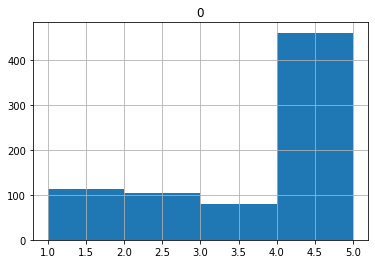

In [204]:
final_df.groupby(by=['group_id']).size().reset_index().hist(bins=4)

In [206]:
pd.read_csv('qualtrics/Sense+AoA+-+Loop+&+Merge_October+20,+2020_14.41.csv')

,startDate,endDate,status,ipAddress,progress,duration,finished,recordedDate,_recordId,recipientLastName,recipientFirstName,recipientEmail,externalDataReference,locationLatitude,locationLongitude,distributionChannel,userLanguage
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,LocationLatitude - Location Latitude,LocationLongitude - Location Longitude,DistributionChannel - Distribution Channel,UserLanguage - User Language
1,2020-10-20 13:12:17,2020-10-20 13:13:19,Survey Preview,NaN,100,61,True,2020-10-20 13:13:20,R_9ubPlSBocaSILJf,NaN,NaN,NaN,NaN,33.9167938232421875,-118.34320068359375,preview,EN
2,2020-10-20 13:29:23,2020-10-20 13:30:22,Survey Preview,NaN,100,58,True,2020-10-20 13:30:22,R_2wB1UBgIVgMxrcm,NaN,NaN,NaN,NaN,33.9167938232421875,-118.34320068359375,preview,EN
3,2020-10-20 13:30:28,2020-10-20 13:31:05,Survey Preview,NaN,100,36,True,2020-10-20 13:31:05,R_1ITu8G59vJAd6Uf,NaN,NaN,NaN,NaN,33.9167938232421875,-118.34320068359375,preview,EN
4,2020-10-20 13:35:22,2020-10-20 13:36:38,Survey Preview,NaN,100,75,True,2020-10-20 13:36:39,R_2RVYT74IjFj06Oa,NaN,NaN,NaN,NaN,33.9167938232421875,-118.34320068359375,preview,EN
5,2020-10-20 14:28:17,2020-10-20 14:30:11,Survey Preview,NaN,100,114,True,2020-10-20 14:30:12,R_2uwHvIFAOsLyUGy,NaN,NaN,NaN,NaN,33.9167938232421875,-118.34320068359375,preview,EN
6,2020-10-20 14:32:23,2020-10-20 14:34:45,Survey Preview,NaN,100,142,True,2020-10-20 14:34:46,R_12nnrUrfafpUVhA,NaN,NaN,NaN,NaN,33.9167938232421875,-118.34320068359375,preview,EN
7,2020-10-20 14:37:10,2020-10-20 14:38:59,IP Address,172.90.206.3,100,109,True,2020-10-20 14:38:59,R_3pfNDMOz5yLfCMw,NaN,NaN,NaN,NaN,33.9167938232421875,-118.34320068359375,anonymous,EN
